The complete explanation for this notebook is available at https://youranalystbuddy.com/decision-tree-splits-in-classification/

# Decision tree splits

In this notebook, we investigate how a tree splits data to solve a classification problem.

## Single split

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
study_time = np.array([1.5,1.2,1.6,1.3,1.7,1.1,2.1,2.9,2.5,2.8,2.3,2.4])
passed = np.array([0,0,0,0,0,0,1,1,1,1,1,1])

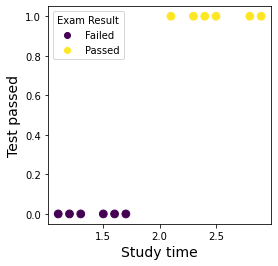

In [3]:
#and visualize them
#colors will represent the two classes in this case
plt.figure(figsize=(4,4))
scatter = plt.scatter(study_time, passed, s=60, c=passed)
classes = ['Failed','Passed']
plt.legend(handles=scatter.legend_elements()[0], labels=classes, title="Exam Result")
plt.xlabel('Study time', fontsize=14)
plt.ylabel('Test passed', fontsize=14)
plt.show()

In [4]:
#now fit a decision tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(study_time.reshape(-1,1), passed)

DecisionTreeClassifier()

We can visualize a tree in SKLearn very easily

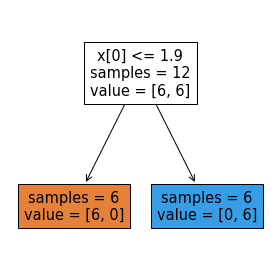

In [5]:
#we use the plot_tree() function from sklearn.tree
from sklearn.tree import plot_tree

#the function takes input as a trained decision tree
plt.figure(figsize=(4,4))
plot_tree(dt, impurity=False, filled=True)
plt.tight_layout()
plt.show()

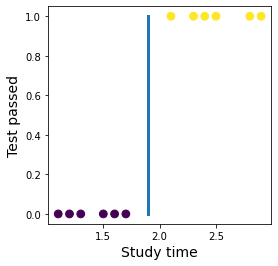

In [6]:
plt.figure(figsize=(4,4))
plt.scatter(study_time, passed, s=60, c=passed)
plt.plot([1.9,1.9], [0,1], linewidth=3) #draw the decision boundary of the split
plt.xlabel('Study time', fontsize=14)
plt.ylabel('Test passed', fontsize=14)
plt.show()

## Multiple split

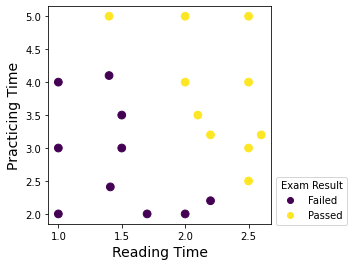

In [7]:
#create some instances 
X = np.array([
    [1,2], [1.5,3], [2,2], [1.41,2.41], [1,3], [1,4], [1.4,4.1], [2.2,2.2], [1.5,3.5], [1.7,2],
    [2.2,3.2], [2,5], [2.5,2.5], [2.6,3.2], [2.1,3.5], [2.5,4], [1.4,5], [2,4], [2.5,3], [2.5,5]
])

Y = np.array([0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1])

plt.figure(figsize=(4,4))
classes = ['Failed','Passed']
scatter = plt.scatter(X[:,0], X[:,1], s=60, c=Y)
plt.legend(handles=scatter.legend_elements()[0], labels=classes, title="Exam Result", bbox_to_anchor=(1, 0.24))
plt.xlabel('Reading Time', fontsize=14)
plt.ylabel('Practicing Time', fontsize=14)
plt.show()

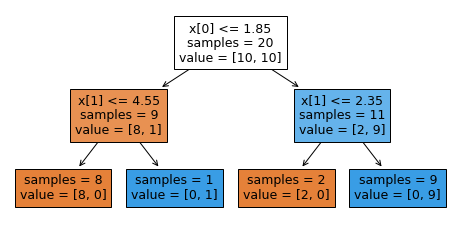

In [8]:
dt = DecisionTreeClassifier()
dt.fit(X,Y)
plt.figure(figsize=(8,4))
plot_tree(dt, impurity=False, filled=True)
plt.show()

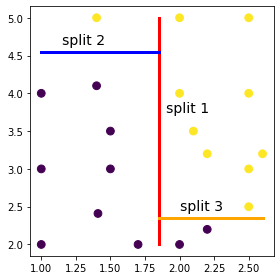

In [9]:
plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1], s=60, c=Y)
plt.plot([1.85,1.85], [2,5], c='red', linewidth=3)
plt.text(1.9, 3.75, 'split 1', fontsize=14)
plt.plot([1,1.85], [4.55,4.55], c='blue', linewidth=3)
plt.text(1.15, 4.65,'split 2', fontsize=14)
plt.plot([1.85,2.6], [2.35,2.35], c='orange', linewidth=3)
plt.text(2, 2.45, 'split 3', fontsize=14)
plt.tight_layout()
plt.show()

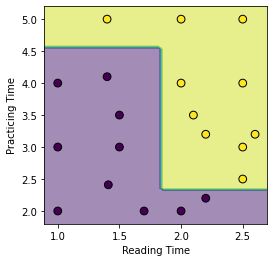

In [10]:
from sklearn.inspection import DecisionBoundaryDisplay

fig, ax = plt.subplots(figsize=(4,4))
disp = DecisionBoundaryDisplay.from_estimator(
    dt, X, response_method="predict",
    xlabel = 'Reading Time', ylabel='Practicing Time',
    alpha = 0.5,
    ax = ax
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=Y, s=60, edgecolor='k')
ax.set_xlim(0.89,2.7)
ax.set_ylim(1.8,5.2)
plt.show()

#### Logistic regression

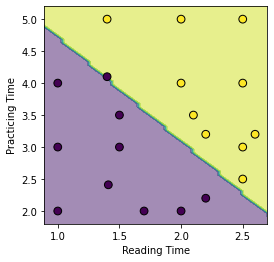

In [11]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X, Y)

fig, ax = plt.subplots(figsize=(4,4))
disp = DecisionBoundaryDisplay.from_estimator(
    logistic, X, response_method="predict",
    xlabel = 'Reading Time', ylabel='Practicing Time',
    alpha = 0.5,
    ax = ax
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=Y, s=60, edgecolor='k')
ax.set_xlim(0.89,2.7)
ax.set_ylim(1.8,5.2)
plt.show()

#### SVM

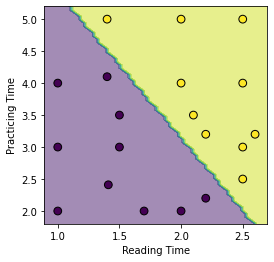

In [12]:
from sklearn.svm import SVC

svc = SVC(kernel='linear', C=10)
svc.fit(X, Y)

fig, ax = plt.subplots(figsize=(4,4))
disp = DecisionBoundaryDisplay.from_estimator(
    svc, X, response_method="predict",
    xlabel = 'Reading Time', ylabel='Practicing Time',
    alpha = 0.5,
    ax = ax
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=Y, s=60, edgecolor='k')
ax.set_xlim(0.89,2.7)
ax.set_ylim(1.8,5.2)
plt.show()

### More complicated examples

In [13]:
X = np.array([
    [1.5,1.1],[1.2,1.3],[1.6,1.2],[1.3,2.4],[1.7,2.1],[1.1,2.5],
    [2.1,1.5],[2.9,1.2],[2.5,1.7],[2.8,2.7],[2.3,2.9],[2.4,3.0]])

Y = np.array([0,0,0,1,1,1,1,1,1,0,0,0])

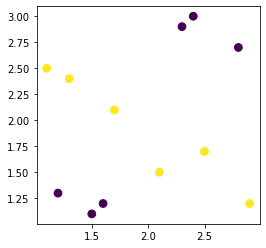

In [14]:
plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1], s=60, c=Y)
plt.show()

In [15]:
dt = DecisionTreeClassifier()
dt.fit(X,Y)

DecisionTreeClassifier()

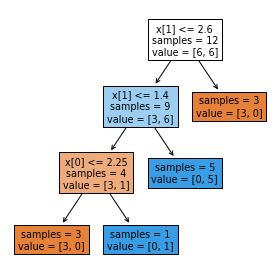

In [16]:
plt.figure(figsize=(4,4))
plot_tree(dt, impurity=False, filled=True)
plt.tight_layout()
plt.show()

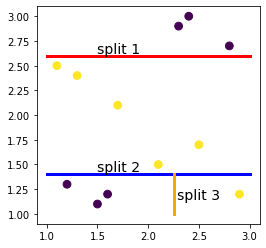

In [17]:
plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1], s=60, c=Y)
plt.plot([1,3], [2.6,2.6], c='red', linewidth=3)
plt.text(1.5, 2.63, 'split 1', fontsize=14)
plt.plot([1,3], [1.4,1.4], c='blue', linewidth=3)
plt.text(1.5, 1.43,'split 2', fontsize=14)
plt.plot([2.25,2.25], [1,1.4], c='orange', linewidth=3)
plt.text(2.28, 1.15, 'split 3', fontsize=14)
plt.show()

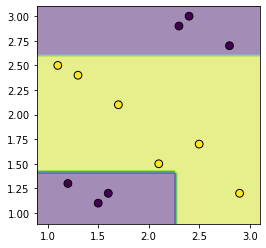

In [18]:
fig, ax = plt.subplots(figsize=(4,4))
disp = DecisionBoundaryDisplay.from_estimator(
    dt, X, response_method="predict",
    alpha = 0.5,
    ax = ax
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=Y, s=60, edgecolor='k')
ax.set_xlim(0.89,3.1)
ax.set_ylim(0.89,3.1)
plt.show()

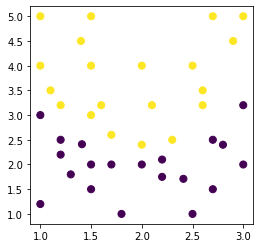

In [19]:
#create some instances 
X = np.array([
    [1.2,2.2], [1.3,1.8], [2,2], [1.41,2.41], [1,3], [1,1.2], [1.2,2.5], [2.8,2.4], [1.5,1.5], [1.7,2],
    [3,2], [2.7,2.5], [1.8,1], [2.41,1.71], [2.2,1.75], [2.2,2.1], [3,3.2], [1.5,2], [2.5,1], [2.7,1.5],
    [1.2,3.2], [1,5], [1.7,2.6], [1.6,3.2], [1.1,3.5], [1.5,4], [1.4,4.5], [1,4], [1.5,3], [1.5,5],
    [2.6,3.2], [2.7,5], [2.3,2.5], [2.1,3.2], [2.6,3.5], [2,4], [2.9,4.5], [2.5,4], [2,2.4], [3,5]
])

Y = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])

plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1], s=50, c=Y)
plt.show()

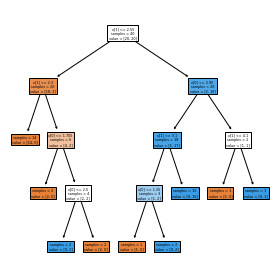

In [20]:
dt = DecisionTreeClassifier()
dt.fit(X,Y)

plt.figure(figsize=(4,4))
plot_tree(dt, impurity=False, filled=True)
plt.tight_layout()
plt.show()

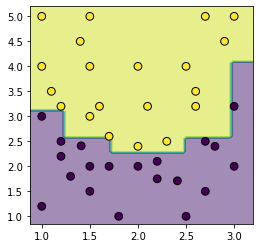

In [21]:
fig, ax = plt.subplots(figsize=(4,4))
disp = DecisionBoundaryDisplay.from_estimator(
    dt, X, response_method="predict",
    alpha = 0.5,
    ax = ax
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=Y, s=60, edgecolor='k')
ax.set_xlim(0.88,3.2)
ax.set_ylim(0.85,5.2)
plt.show()

## Overfit example

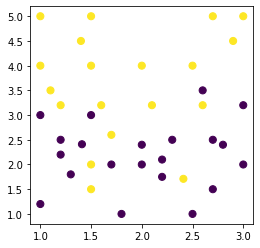

In [22]:
#create some instances 
X = np.array([
    [1.2,2.2], [1.3,1.8], [2,2], [1.41,2.41], [1,3], [1,1.2], [1.2,2.5], [2.8,2.4], [1.5,1.5], [1.7,2],
    [3,2], [2.7,2.5], [1.8,1], [2.41,1.71], [2.2,1.75], [2.2,2.1], [3,3.2], [1.5,2], [2.5,1], [2.7,1.5],
    [1.2,3.2], [1,5], [1.7,2.6], [1.6,3.2], [1.1,3.5], [1.5,4], [1.4,4.5], [1,4], [1.5,3], [1.5,5],
    [2.6,3.2], [2.7,5], [2.3,2.5], [2.1,3.2], [2.6,3.5], [2,4], [2.9,4.5], [2.5,4], [2,2.4], [3,5]
])

Y = np.array([0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,1,1,1,1,1,1,0,1,1,1,0,1,0,1,1,1,0,1])

plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1], s=50, c=Y)
plt.show()

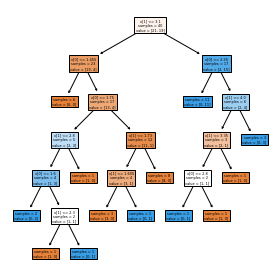

In [23]:
dt = DecisionTreeClassifier()
dt.fit(X,Y)

plt.figure(figsize=(4,4))
plot_tree(dt, impurity=False, filled=True)
plt.tight_layout()
plt.show()

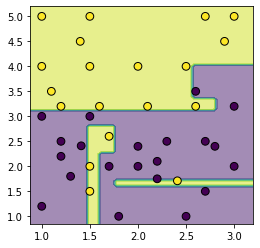

In [24]:
fig, ax = plt.subplots(figsize=(4,4))
disp = DecisionBoundaryDisplay.from_estimator(
    dt, X, response_method="predict",
    alpha = 0.5,
    ax = ax
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=Y, s=60, edgecolor='k')
ax.set_xlim(0.88,3.2)
ax.set_ylim(0.85,5.2)
plt.show()

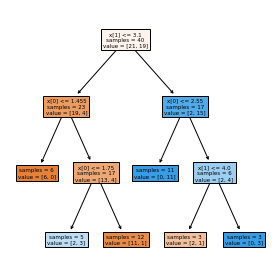

In [25]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X,Y)

plt.figure(figsize=(4,4))
plot_tree(dt, impurity=False, filled=True)
plt.tight_layout()
plt.show()

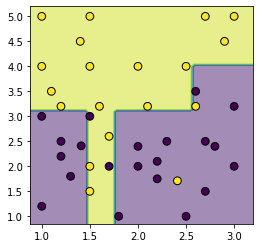

In [26]:
fig, ax = plt.subplots(figsize=(4,4))
disp = DecisionBoundaryDisplay.from_estimator(
    dt, X, response_method="predict",
    alpha = 0.5,
    ax = ax
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=Y, s=60, edgecolor='k')
ax.set_xlim(0.88,3.2)
ax.set_ylim(0.85,5.2)
plt.show()